# **Section 4: Practical machine learning issues**
<a href="https://colab.research.google.com/github/osuranyi/UdemyCourses/blob/main/LinearRegression/Section4_PracticalMachineLearningIssues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using the previously written linear regression class:

In [ ]:
class LinearRegression:
  def add_ones(self,X_in):
    if X_in.ndim == 1:
      X_in.shape = [X_in.shape[0],1]
    return np.column_stack( (np.ones(X_in.shape[0]),X_in) )
  
  def fit(self,X_in,y):
    X = self.add_ones(X_in) 
    U = X.T @ X
    v = X.T @ y
    self.theta = np.linalg.solve(U,v)

  def predict(self,X_in):
    X = self.add_ones(X_in)
    return X @ self.theta

  def score(self,X_in,y):
    SSres = self.error(X_in,y)
    SStot = (y-y.mean()).T @ (y-y.mean())
    return 1. - SSres/SStot

  def error(self,X_in,y):
    return (y-self.predict(X_in)).T @ (y-self.predict(X_in)) / y.shape[0]

## **Generalization and overfitting**

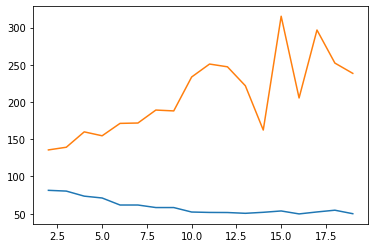

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_poly.csv',header=None)

x = data[0].values
y = data[1].values

model = LinearRegression()

# Split into train and test curves
x_train = x[:30]
y_train = y[:30]
x_test = x[30:60]
y_test = y[30:60]

X_train = x_train
X_test = x_test
X_train.shape = [x_train.shape[0],1]
X_test.shape = [x_test.shape[0],1]

# Perform polynomial regressions with degrees 2-5
degrees = range(2,20)
err_train = []
err_test = []

x_fit = np.linspace(x_test.min(),x_test.max(),100)
x_fit.shape = [100,1]
X_fit = x_fit

for d in degrees:
  X_train = np.append(X_train,x_train**d,axis=1)
  X_test = np.append(X_test,x_test**d,axis=1)
  X_fit = np.append(X_fit,x_fit**d,axis=1)

  model.fit(X_train,y_train)

  err_train.append(model.error(X_train,y_train))
  err_test.append(model.error(X_test,y_test))

  #plt.subplot(4,5,d-1)
  #plt.scatter(x_test,y_test)
  
  #plt.plot(xfit,model.predict(X_fit),c='r')

plt.plot(degrees,err_train)
plt.plot(degrees,err_test)

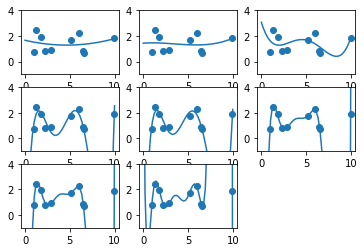

In [ ]:
x = np.random.uniform(0,10,10)
y = np.random.uniform(0.5,2.5,10)

x.shape = [10,1]
X = x

x_line = np.linspace(0,10,50)
x_line.shape = [50,1]
X_line = x_line

for d in range(2,10):
  X = np.append(X,x**d,axis=1)
  model.fit(X,y)

  X_line = np.append(X_line,x_line**d,axis=1)
  y_line = model.predict(X_line)

  plt.subplot(3,3,d-1)
  plt.ylim([-1,4])
  plt.scatter(x,y)
  plt.plot(x_line,y_line)

## **L2 regularization**

The usual cost function of linear regression is modified as:
$$
J = (Y-Xw)^T (Y-Xw) + \lambda w^T w
$$
The new term quadratic in $w$ is the so-called regularization term (in particular L2 regularization). This penalizes too large values of $w$ in order to prevent overfitting. $\lambda$ is called the regularization strength. Similarly, we can derive the minimum of the cost by taking partial derivatives with respect to $w$ and setting them to zero:
$$
0 = -2X^T(Y-Xw) + 2\lambda w,
$$
which can be rearranged as:
$$
(X^TX + \lambda I) \cdot w = X^T Y,
$$
where $I$ is the identity matrix.

*Remark:* here, I started to use the notation conventions of course videos. These do not denote explicitly matrices and vectors.

In [ ]:
class LinearRegressionL2Regularization:
  def __init__(self,lamb=1.0):
    self.lamb = lamb

  def add_ones(self,X_in):
    if X_in.ndim == 1:
      X_in.shape = [X_in.shape[0],1]
    return np.column_stack( (np.ones(X_in.shape[0]),X_in) )
  
  def fit(self,X_in,y):
    X = self.add_ones(X_in)
    reg = np.eye(X.shape[1])
    #reg[0,0] = 0   # => sometimes the intercept is not regularized
    U = X.T @ X + self.lamb * reg 
    v = X.T @ y
    self.theta = np.linalg.solve(U,v)

  def predict(self,X_in):
    X = self.add_ones(X_in)
    return X @ self.theta

  def score(self,X_in,y):
    SSres = self.error(X_in,y)
    SStot = (y-y.mean()).T @ (y-y.mean())
    return 1. - SSres/SStot

  def error(self,X_in,y):
    return (y-self.predict(X_in)).T @ (y-self.predict(X_in)) / y.shape[0]

Testing the code using generated data:

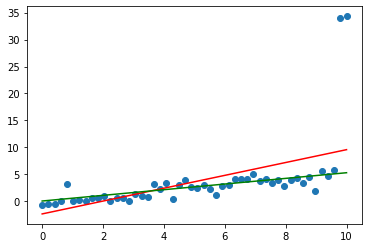

In [ ]:
N = 50

X = np.linspace(0,10,N)
Y = 0.5*X + np.random.randn(N)

# Manually set outliers
Y[-1] += 30
Y[-2] += 30

model = LinearRegression()
model.fit(X,Y)
Y_fit = model.predict(X)
model2 = LinearRegressionL2Regularization(lamb=1000.0)
model2.fit(X,Y)
Y_fit2 = model2.predict(X)

plt.scatter(X,Y)
plt.plot(X,Y_fit,c='r')
plt.plot(X,Y_fit2,c='g');


## **Gradient descent**

Gradient descent is used to find a (local) optimum of a function $J(w)$:
$$
w_{i+1} = w_{i} - \alpha \frac{\partial J}{\partial w},
$$
where $\alpha$ is called the learning rate. This can be used for more complex problems, such as the training of neural networks.

In [ ]:
w = 20      # initial guess
alpha = 0.1 # learning rate

for i in range(30):
  w = w - alpha * 2*w
  print(w)

16.0
12.8
10.24
8.192
6.5536
5.24288
4.194304000000001
3.3554432000000007
2.6843545600000005
2.1474836480000006
1.7179869184000005
1.3743895347200004
1.0995116277760002
0.8796093022208001
0.7036874417766401
0.562949953421312
0.45035996273704965
0.3602879701896397
0.28823037615171176
0.23058430092136942
0.18446744073709553
0.14757395258967643
0.11805916207174114
0.09444732965739291
0.07555786372591433
0.06044629098073147
0.048357032784585176
0.03868562622766814
0.030948500982134513
0.02475880078570761


**Exercise:** Try to optimize the following function:
$$
J(w_1,w_2) = w_1^2 + w_2^4.
$$
First, we calculate the partial derivatives:
\begin{align}
\frac{\partial J}{\partial w_1} &= 2w_1 \\
\frac{\partial J}{\partial w_2} &= 4w_2^3
\end{align}

In [ ]:
w1 = 10
w2 = 10

alpha = 0.5

for i in range(30):
  w1 = w1 - alpha * w1
  w2 = w2 - alpha * w2
  print(w1,w2)

5.0 5.0
2.5 2.5
1.25 1.25
0.625 0.625
0.3125 0.3125
0.15625 0.15625
0.078125 0.078125
0.0390625 0.0390625
0.01953125 0.01953125
0.009765625 0.009765625
0.0048828125 0.0048828125
0.00244140625 0.00244140625
0.001220703125 0.001220703125
0.0006103515625 0.0006103515625
0.00030517578125 0.00030517578125
0.000152587890625 0.000152587890625
7.62939453125e-05 7.62939453125e-05
3.814697265625e-05 3.814697265625e-05
1.9073486328125e-05 1.9073486328125e-05
9.5367431640625e-06 9.5367431640625e-06
4.76837158203125e-06 4.76837158203125e-06
2.384185791015625e-06 2.384185791015625e-06
1.1920928955078125e-06 1.1920928955078125e-06
5.960464477539062e-07 5.960464477539062e-07
2.980232238769531e-07 2.980232238769531e-07
1.4901161193847656e-07 1.4901161193847656e-07
7.450580596923828e-08 7.450580596923828e-08
3.725290298461914e-08 3.725290298461914e-08
1.862645149230957e-08 1.862645149230957e-08
9.313225746154785e-09 9.313225746154785e-09


## **Bypass the dummy variable trap with gradient descent**

Engineer a specific situation, when when $X^TX$ is singular, thus we cannot solve the normal equations. However, as we will see, gradient still can be used.

In [ ]:
N = 10
D = 3

X = np.zeros((N,D))
X[:,0] = 1
X[:5,1] = 1
X[5:,2] = 1

Y = np.array([0]*5 + [1]*5)

This would give an error, as `X.T @ X` is singular:

In [ ]:
#w = np.linalg.solve(X.T @ X, X.T @ Y)

Implementing gradient descent instead:

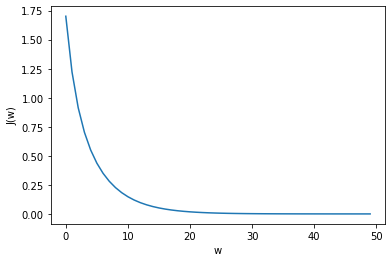

In [ ]:
steps = range(50)
alpha = 0.01

w = np.random.randn(3)/np.sqrt(3)

J = []

for i in steps:
  Yhat = X @ w
  diff = Y - Yhat
  w = w - alpha * (-2. * X.T @ diff)
  J.append( diff.T @ diff )

plt.plot(steps,J)
plt.ylabel("J(w)")
plt.xlabel("w");


## **L1 regularization**

The regularization term now uses the L1-norm:
$$
J = (Y-Xw)^T (Y-Xw) + \lambda \sum_i |w_i|
$$
The derivative is
$$
\frac{\partial J}{\partial w} = -2X^T(Y-Xw) + \lambda \cdot \mathrm{sign}(w).
$$
We cannot compute the inverse because of the sign function; therefore, we should use gradient descent:

In [ ]:
class LinearRegressionL1Regularization:
  def __init__(self,lamb=1.0,steps=100,learning_rate=0.1):
    self.lamb = lamb
    self.steps = steps
    self.learning_rate = learning_rate

  def add_ones(self,X_in):
    if X_in.ndim == 1:
      X_in.shape = [X_in.shape[0],1]
    return np.column_stack( (np.ones(X_in.shape[0]),X_in) )
  
  def fit(self,X_in,y):
    X = X_in
    #X = self.add_ones(X_in)  # REMARK: in this example, intercept term was not used somewhy...
    # randomly initialize weights
    self.w = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1])
    J = []
    for s in range(self.steps):
      y_hat = X @ self.w 
      diff = y - y_hat
      self.w = self.w - self.learning_rate * ( - X.T @ diff + self.lamb * np.sign(self.w) )
      J.append( diff.T @ diff / y.shape[0] )
    return J

  def predict(self,X_in):
    X = self.add_ones(X_in)
    return X @ self.w

  def score(self,X_in,y):
    SSres = self.error(X_in,y)
    SStot = (y-y.mean()).T @ (y-y.mean())
    return 1. - SSres/SStot

  def error(self,X_in,y):
    return (y-self.predict(X_in)).T @ (y-self.predict(X_in)) / y.shape[0]

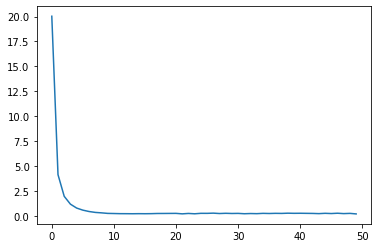

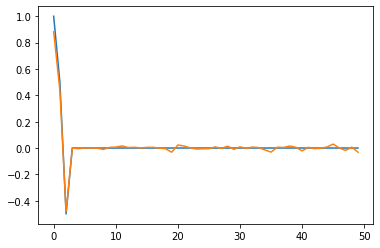

In [ ]:
# Testing the L1 regression class

N = 50
D = 50

X = (np.random.random((N,D)) - 0.5)*10
true_w = np.array([1,0.5,-0.5] + [0]*(D-3))


Y = X @ true_w + np.random.randn(N)*0.5

model = LinearRegressionL1Regularization(lamb=10., steps=50, learning_rate=0.001)

J = model.fit(X,Y)
plt.plot(J)
plt.show()

plt.plot(true_w)
plt.plot(model.w)
plt.show()

We might use both L1 and L2 regularizations; this is called the EleasticNet. Summarizing the type of regularizations:
\begin{align}
J_{\text{RIDGE}} &= J + \lambda_2 |w|^2 \\
J_{\text{LASSO}} &= J + \lambda_1 |w| \\
J_{\text{ELASTICNET}} &= J + \lambda_1 |w| + \lambda_2 |w|^2
\end{align}

### **Remark:** Weight initialization

Suggested method to initialize weights:

`w = np.random.randn(D) / np.sqrt(D)`

The output will be also standardized, given the inputs $x$ were also standardized.